In [1]:
# import libraries
import numpy as np
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# load dataset
df = pd.read_excel('Metro-Ext.xlsx')

In [3]:
# view data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Feasibility and Constructability                           300 non-null    float64
 1   Slopes and Gradients                                       300 non-null    float64
 2   Urban Realm                                                300 non-null    float64
 3   Geology and Soil Stability                                 300 non-null    float64
 4   Land Acquisition                                           300 non-null    float64
 5   Work Opportunities                                         300 non-null    float64
 6   Economy in Movement of People                              300 non-null    float64
 7   Revenue Generation                                         300 non-null    float64
 8   Access to 

In [4]:
# statistics of the data
df.describe()

,Feasibility and Constructability,Slopes and Gradients,Urban Realm,Geology and Soil Stability,Land Acquisition,Work Opportunities,Economy in Movement of People,Revenue Generation,"Access to the Social, Recreational and Emergency Services","Neighbourhood Acceptance (Sound, Vibration, etc)",Improvement of Quality of Life,Convenience in Movement of People,Protection of the Ecosystem,"Pollution (Water, Air, Soil, Visual) Control",CO2 Emission Control,Conservation of Vegetation and Plants
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.018524,2.687904,3.025570,2.980050,3.039133,4.012163,3.354917,3.340062,3.010525,2.051738,3.020899,3.329140,3.025682,2.997540,2.363010,2.697953
std,0.915210,0.618664,0.430542,0.899399,0.920015,0.376961,0.629585,0.652734,0.928430,0.412914,0.403493,0.618064,0.405509,0.398348,0.586417,0.600541
min,1.080897,1.058648,2.110783,1.239396,1.073090,3.072055,2.094777,2.034887,1.158474,1.086225,2.143652,2.171364,2.129627,2.089670,1.148507,1.161559
25%,2.297806,2.243804,2.711284,2.228568,2.265387,3.755851,2.913763,2.844018,2.243882,1.756443,2.726517,2.864976,2.737635,2.709803,1.930946,2.309042
50%,3.046850,2.746993,3.019781,2.935539,3.001062,4.020903,3.273202,3.249080,2.949725,2.018515,3.011248,3.252177,3.002173,3.024653,2.316139,2.789978
75%,3.785556,3.124006,3.349974,3.738096,3.789702,4.275031,3.823415,3.834143,3.801915,2.378139,3.324394,3.700611,3.318654,3.288285,2.784560,3.098397
max,4.939735,3.926976,3.972290,4.879566,4.998340,4.909136,4.908976,4.804223,4.852447,2.893622,3.975549,4.940949,3.966327,3.987809,3.858781,3.790478


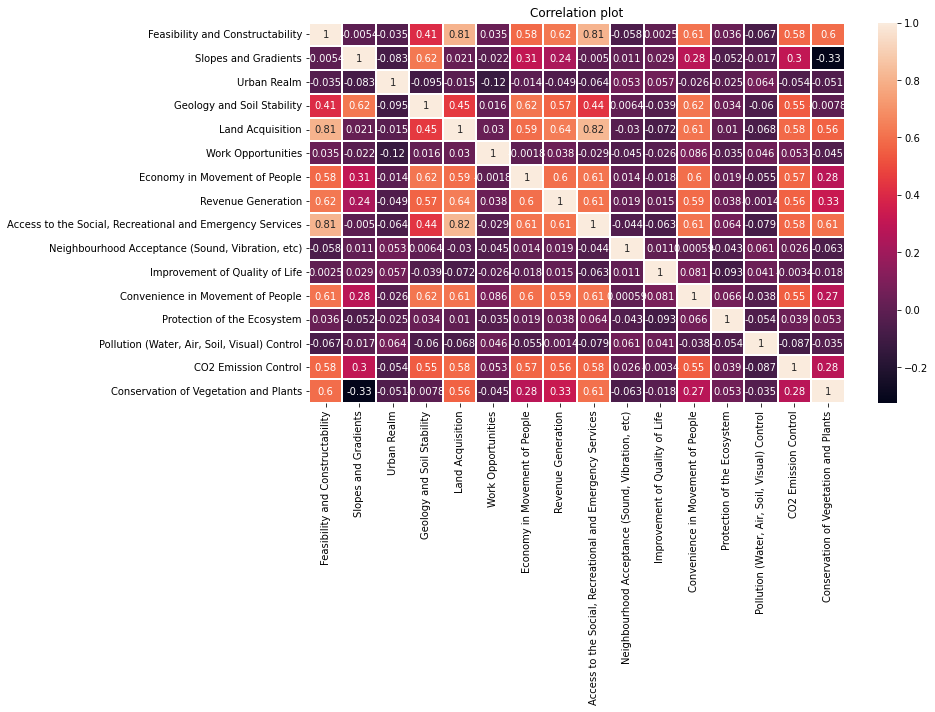

In [5]:
# find the correlation between two features
plt.figure(figsize=(12,7) )
corr_plot = sns.heatmap(df.corr(),annot = True,linewidths=1 )
plt.title("Correlation plot")
plt.show()

We can see that 

"Access to the Social, Recreational and Emergency Services" and "Feasibility and Constructability" has 0.81 correlation. 

Also, "Access to the Social, Recreational and Emergency Services" and "Land Acquisition" has 0.82 correlation. 

Also, "Land Acquisition" and "Feasibility and Constructability" has 0.81 correlation.

These are good correlation, other features have less coreelation than them.

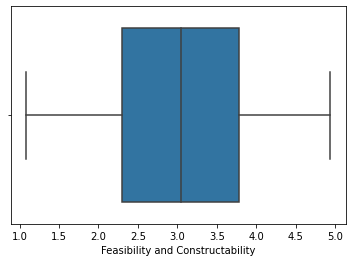

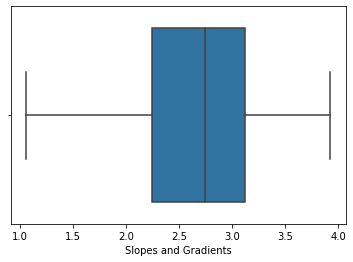

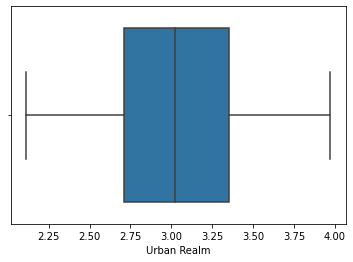

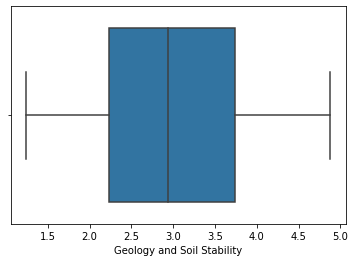

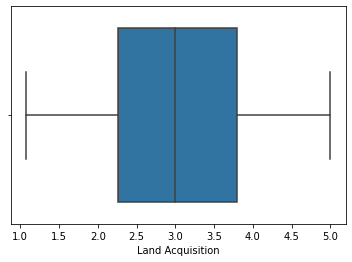

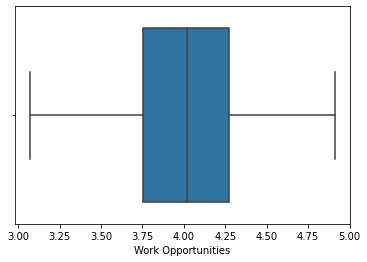

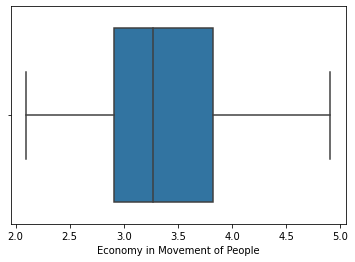

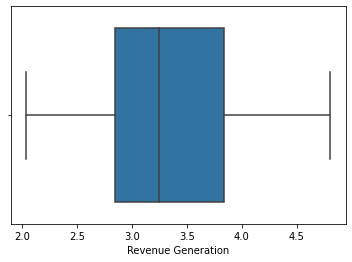

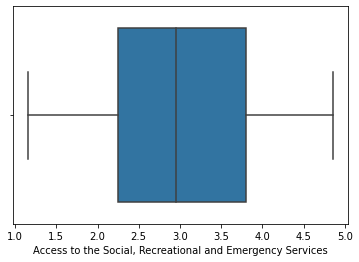

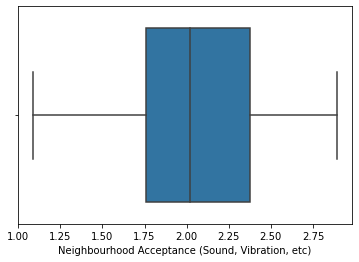

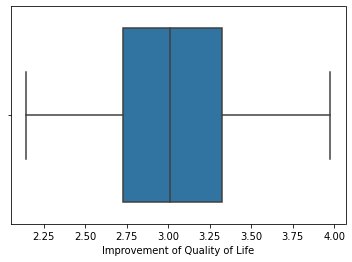

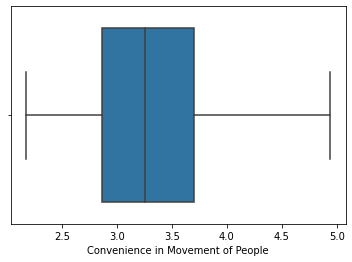

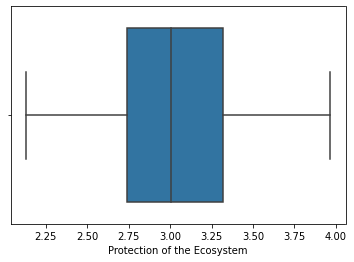

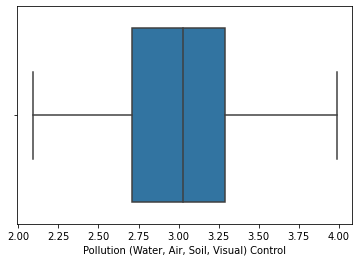

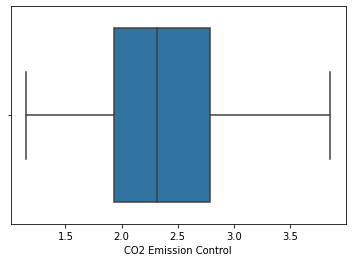

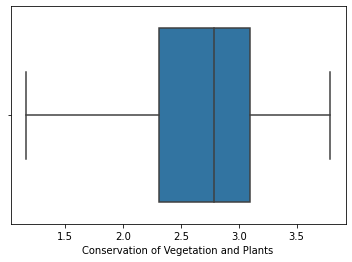

In [6]:
# Check the outliers
numeric = [col for col in df.columns if df[col].dtypes != object]
for i in numeric:
  sns.boxplot(x = df[i])
  plt.show()

We can see that no outliers in all features by box plot

In [7]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# check vif multicollinearity
numeric = [col for col in df.columns if df[col].dtypes != object]
dt = df[numeric]
calc_vif(dt)

,variables,VIF
0,Feasibility and Constructability,48.141579
1,Slopes and Gradients,39.694101
2,Urban Realm,45.686151
3,Geology and Soil Stability,39.450561
4,Land Acquisition,50.119184
5,Work Opportunities,82.155445
6,Economy in Movement of People,67.606467
7,Revenue Generation,61.428479
8,"Access to the Social, Recreational and Emergen...",52.634010
9,"Neighbourhood Acceptance (Sound, Vibration, etc)",24.927950


We can see that all features have multicollinearity because all of them are more than 10

Show the number of data in each class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


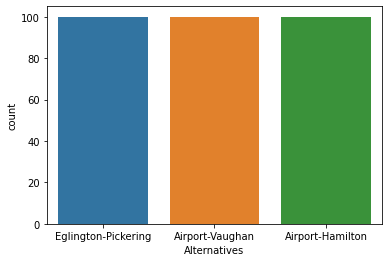

In [9]:
sns.countplot(df['Alternatives'])
plt.show()

We can see that it is a balanced dataset, each class has 100 rows of data

Show the data distribution of Revenue Generation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


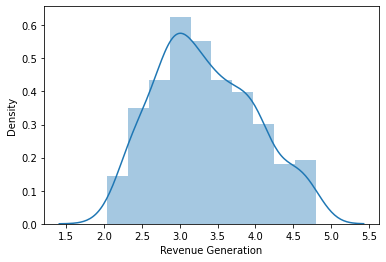

In [10]:
sns.distplot(df["Revenue Generation"])

We can see that 4.0 of revenue generation has the highest distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


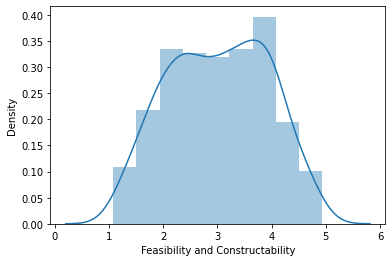

In [11]:
sns.distplot(df["Feasibility and Constructability"])

We can see that 4.0 of feasibility and Constructability has the highest distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


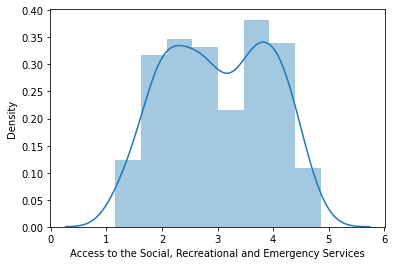

In [12]:
sns.distplot(df["Access to the Social, Recreational and Emergency Services"])

We can see that 4.0 of access to the Social, Recreational and Emergency Services has the highest distribution

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Feasibility and Constructability                           300 non-null    float64
 1   Slopes and Gradients                                       300 non-null    float64
 2   Urban Realm                                                300 non-null    float64
 3   Geology and Soil Stability                                 300 non-null    float64
 4   Land Acquisition                                           300 non-null    float64
 5   Work Opportunities                                         300 non-null    float64
 6   Economy in Movement of People                              300 non-null    float64
 7   Revenue Generation                                         300 non-null    float64
 8   Access to 

In [14]:
# replace string to integer
df['Alternatives'] = df['Alternatives'].replace(['Airport-Hamilton', 'Airport-Vaughan', 'Eglington-Pickering'], [0, 1, 2])

In [15]:
df.head()

,Feasibility and Constructability,Slopes and Gradients,Urban Realm,Geology and Soil Stability,Land Acquisition,Work Opportunities,Economy in Movement of People,Revenue Generation,"Access to the Social, Recreational and Emergency Services","Neighbourhood Acceptance (Sound, Vibration, etc)",Improvement of Quality of Life,Convenience in Movement of People,Protection of the Ecosystem,"Pollution (Water, Air, Soil, Visual) Control",CO2 Emission Control,Conservation of Vegetation and Plants,Alternatives
0,4.800817,3.209256,2.806324,4.336878,4.357547,3.603193,3.845156,4.125748,4.366895,1.379341,2.550943,3.775541,3.524775,3.629538,2.954195,3.421358,2
1,3.940171,2.840818,2.704240,4.879566,4.486020,4.193018,4.908976,3.336437,4.110715,1.962038,2.294488,4.883952,3.490180,2.954713,2.686370,3.419124,2
2,3.756592,3.387751,2.488971,4.474553,3.515499,4.068900,3.626062,3.995979,4.015432,2.532970,2.874764,3.786108,2.821704,3.182303,2.889181,3.143561,2
3,3.747185,2.719714,2.849873,3.851155,4.145828,4.557727,3.821503,4.561830,4.176506,1.594251,2.621621,4.348258,3.551999,2.502345,2.347765,3.065289,2
4,4.749572,2.970412,2.368111,3.928895,4.436155,4.243389,3.904293,4.062795,3.491793,1.897258,2.631383,3.671141,3.436906,2.730879,2.698561,2.977945,2


In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape


#""The feature matrix contains the values of all 16 features in the dataset.It  is a 300x16 two-dimensional Numpy array. It is stored in the X variable."""

((300, 16), (300,))

In [17]:

"""Standardize the features if necessary
You can see that the values of the dataset are not equally scaled. 
So, we need to apply z-score standardization to get all features into the same scale. 
For this, we use Scikit-learn StandardScaler() class which is in the preprocessing submodule in Scikit-learn."""


from sklearn.preprocessing import StandardScaler

#create the object 
sc = StandardScaler()

#calculate the mean and standard deviation
#transform the values 
X_scaled = sc.fit_transform(X)

PCA

In [18]:
"""Choose the right number of dimensions (k)
Now, we are ready to apply PCA for our dataset."""

from sklearn.decomposition import PCA
pca_30 = PCA(n_components = 16, random_state=0)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)


In [19]:
"""The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array
which contains the values of the percentage of variance explained by each of the selected components."""

pca_30.explained_variance_ratio_*100

array([34.62725677, 11.91320903,  7.57783932,  6.94937848,  6.33532887,
        5.93286263,  5.65225982,  5.37830201,  2.86239011,  2.55284576,
        2.42988692,  2.30384917,  1.87318792,  1.40708548,  1.16105881,
        1.0432589 ])

Text(0, 0.5, 'Explained variance')

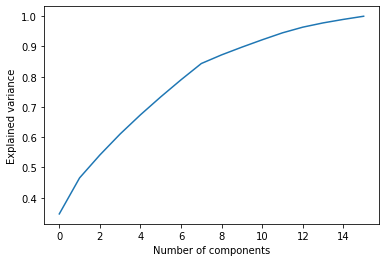

In [20]:
#create following plot

plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [21]:
"""Let’s apply PCA to our dataset with n_components=0.95.
This will select the number of components while preserving 95% of the variability in the data."""

from sklearn.decomposition import PCA
pca_95 = PCA(n_components = 0.95, random_state=0)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
#Create training and testing variables by splitting data into 75:25 train:test ratio
X_train, X_test, y_train, y_test = train_test_split(X_pca_95, y, test_size=0.25, random_state=0)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score

K-Means


In [25]:
from sklearn.cluster import KMeans
# we have 3 classes, so we choose the number to 3 as a baseline model
kmeans_base = KMeans(n_clusters = 3, init='k-means++')
kmeans_base.fit(X_scaled)
k_pred_base = kmeans_base.predict(X_scaled)

Text(0, 0.5, 'Inertia')

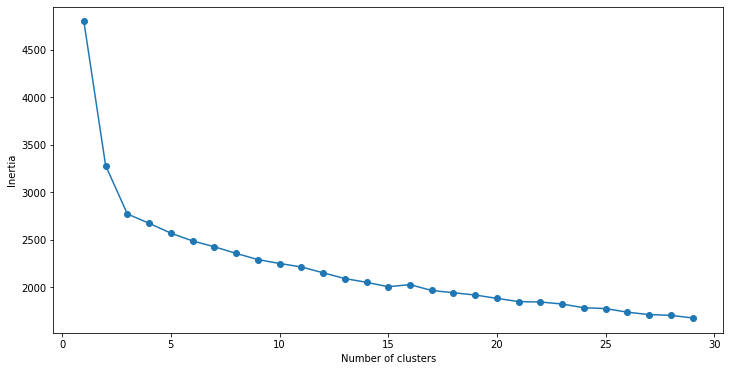

In [26]:
#We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. 
#We will store the inertia value of each model and then plot it to visualize the result:

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,30):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', max_iter = 300, n_init= 10)
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
# we choose the number between 10 and 15
# k means using 10 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 10, init='k-means++', max_iter = 300, n_init= 10)
kmeans.fit(X_scaled)
k_pred = kmeans.predict(X_scaled)

In [28]:
means=kmeans.cluster_centers_
print(means)

[[-1.08674874  0.5811055   1.16960905 -0.08174168 -1.02068162 -0.30686379
  -0.32669384 -0.54632724 -1.03069913 -0.24921126  0.46060383 -0.58247701
  -0.30871118  0.89886494 -0.85390456 -0.82254704]
 [ 0.96862861  0.44231324 -0.62337517  1.04795801  1.20600533  0.1847691
   1.11064939  1.25103102  1.17137276  0.97586908  0.02051841  0.83121159
  -0.33785826 -0.01207545  1.23205779  0.52625505]
 [-1.11320085  0.58234901 -0.7312752   0.02419352 -1.11523464 -0.03139976
  -0.59553904 -0.43953809 -1.06643155 -0.10287132  0.76072241 -0.34408448
   0.44218548 -0.37036979 -0.39576346 -1.00198048]
 [-0.02817984 -1.2104632   0.37969306 -1.13102378 -0.01905052  0.05981929
  -0.53883707 -0.57433717  0.11843152  0.33902952 -0.50881283 -0.56571501
   0.13685417 -0.94943591 -0.58467054  0.65942309]
 [ 1.05764187  0.37111641 -0.76045141  1.24809611  1.1953853   0.61019222
   0.82853779  1.03356676  1.14112999 -0.86542537 -0.60926249  1.13054751
   0.31627825  0.23893002  0.82135544  0.37531466]
 [ 0.1

In [29]:
# show total of cluster
frame = pd.DataFrame(X_scaled)
frame['cluster'] = k_pred
frame['cluster'].value_counts()

6    46
5    36
2    33
7    31
3    31
4    28
8    27
1    26
9    22
0    20
Name: cluster, dtype: int64

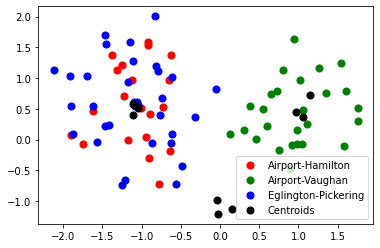

In [30]:
# plot the data
plt.scatter(X_scaled[k_pred == 0, 0], X_scaled[k_pred == 0, 1], s=50, c = 'red', label = 'Airport-Hamilton')
plt.scatter(X_scaled[k_pred == 1, 0], X_scaled[k_pred == 1, 1], s=50, c = 'green', label = 'Airport-Vaughan')
plt.scatter(X_scaled[k_pred == 2, 0], X_scaled[k_pred == 2, 1], s=50, c = 'blue', label = 'Eglington-Pickering')
# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=50, c='black', label = 'Centroids')

plt.legend()
plt.show()

Neural network

In [31]:
#MODEL BUILDING

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model_base = Sequential()

model_base.add(Dense(24, activation='relu', input_dim=X_train.shape[1]))
model_base.add(Dropout(0.1))
model_base.add(Dense(3, activation='softmax'))
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_base.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
history = model_base.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/50
4/4 [==============================] - 1s 67ms/step - loss: 1.2160 - accuracy: 0.3733 - val_loss: 1.1495 - val_accuracy: 0.4400
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1608 - accuracy: 0.3822 - val_loss: 1.1219 - val_accuracy: 0.4800
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1484 - accuracy: 0.3733 - val_loss: 1.0959 - val_accuracy: 0.4933
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 1.1183 - accuracy: 0.4222 - val_loss: 1.0710 - val_accuracy: 0.4933
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0969 - accuracy: 0.4400 - val_loss: 1.0468 - val_accuracy: 0.5067
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0732 - accuracy: 0.4267 - val_loss: 1.0235 - val_accuracy: 0.5200
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 1.0488 - accuracy: 0.4756 - val_loss: 1.0007 - val_accuracy: 0.5467
Epoch 8/50
4/4 [===========

In [34]:
model_base.evaluate(X_test, y_test)
y_pred_model_base = model_base.predict(X_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.9867


In [35]:
def create_model(lyrs=[24], act='linear', opt='Adam', dr=0.2):
    
    # set random seed for reproducibility
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(3, activation='softmax'))  # output layer
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
# from tensorflow import set_random_seed
from tensorflow.python.framework.random_seed import set_random_seed

Grid search

In [37]:
#Grid search
#batch size and epochs
#We can see from the graph above that we might be training our network for too long. Let's use grid search to find out what the optimal values for batch_size and epochs are.


#create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [64,128]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  import sys


[CV] END ...........................batch_size=64, epochs=50; total time=   0.9s
[CV] END ...........................batch_size=64, epochs=50; total time=   0.9s
[CV] END ...........................batch_size=64, epochs=50; total time=   1.0s
[CV] END ..........................batch_size=64, epochs=100; total time=   1.3s
[CV] END ..........................batch_size=64, epochs=100; total time=   1.3s
[CV] END ..........................batch_size=64, epochs=100; total time=   1.4s
[CV] END ..........................batch_size=128, epochs=50; total time=   0.9s
[CV] END ..........................batch_size=128, epochs=50; total time=   0.9s
[CV] END ..........................batch_size=128, epochs=50; total time=   0.9s
[CV] END .........................batch_size=128, epochs=100; total time=   1.0s
[CV] END .........................batch_size=128, epochs=100; total time=   1.0s
[CV] END .........................batch_size=128, epochs=100; total time=   1.2s


In [38]:
# summarize results
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.986667 using {'batch_size': 64, 'epochs': 50}


In [39]:
#create model
model = KerasClassifier(build_fn=create_model, epochs=best_epochs, batch_size=best_batch_size, verbose=0)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   1.0s
[CV] END ........................................opt=RMSprop; total time=   0.9s
[CV] END ...........................................opt=Adam; total time=   0.9s
[CV] END ...........................................opt=Adam; total time=   1.0s
[CV] END ...........................................opt=Adam; total time=   1.3s
[CV] END ...........................................opt=Adam; total time=   0.9s
[CV] END ...........................................opt=Adam; total time=   0.9s


In [40]:
# summarize results
best_opt = grid_result.best_params_['opt']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.986667 using {'opt': 'RMSprop'}


In [41]:
# create final model
model = create_model(opt=best_opt)

print(model.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 24)                336       
                                                                 
 dropout_25 (Dropout)        (None, 24)                0         
                                                                 
 dense_51 (Dense)            (None, 3)                 75        
                                                                 
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
# train model on full train set, with 75/25 CV split
training = model.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size, 
                     validation_data=(X_test,y_test), verbose=0)

# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
y_pred_model = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9867

accuracy: 98.67%


Get the confusion matrix on the best neural network model

In [48]:
# Visualizing confusion matrix
print(confusion_matrix(y_test, y_pred_model.argmax(axis=1)))

[[26  0  0]
 [ 1 24  0]
 [ 0  0 24]]


Compare all models

In [44]:
all_results = {}
all_results['kmeans_base'] = accuracy_score(y, k_pred_base)
all_results['kmeans_elbow'] = accuracy_score(y, k_pred)
all_results['DL_Base'] = model_base.evaluate(X_test, y_test)[1]
all_results['DL_Best'] = model.evaluate(X_test, y_test)[1]

3/3 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9867


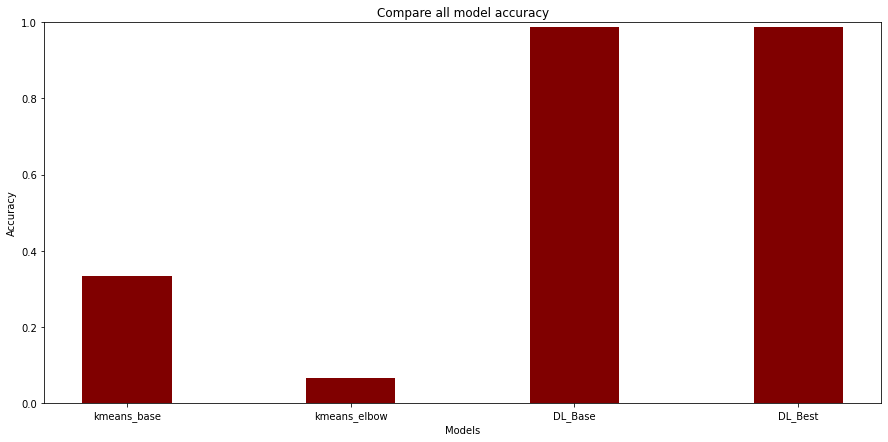

In [45]:
models = list(all_results.keys())
accuracy = list(all_results.values())

fig = plt.figure(figsize = (15, 7))

# creating the bar plot
plt.bar(models, accuracy, color ='maroon',
		width = 0.4)

plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Compare all model accuracy")
plt.show()

In the kmeans_base, it used 3 clusters for 3 classes. In the kmeans_elbow, we set 10 clusters. We can see that if we increase the number of clusters, the accuracy will decrease.

Therefore, we choose neural network with grid search. Because the accuracy is the best

Predict new data

In [46]:
def predict_result(result):
  print(result)
  if result == 0:
    return "It is Airport-Hamilton"
  elif result == 1:
    return "It is Airport-Vaughan"
  else:
    return "It is Eglington-Pickering"

In [47]:
new_data = np.array([[1.2,2.5,3.5,6.2,2.1,3.4,0.7,2.1,0.1,1.8,0.7,5.4, 1.8]])    
new_data_scaled = sc.transform(new_data)
my_pred = model.predict(new_data_scaled)
my_pred = np.argmax(my_pred, axis=1)
predict_result(my_pred)

[1]


'It is Airport-Vaughan'

Therefore, I came of my_data = [1.2,2.5,3.5,6.2,2.1,3.4,0.7,2.1,0.1,1.8,0.7,5.4, 1.8], the prediction it is Airport-Vaughan